# `0. 가설설정`

1. 범죄율(CRIM)이 높을수록 주택가격은 낮아질 것이다.(-)
2. 주거당 평균 객실 수가 클수록 주택가격은 올라갈 것이다. (+)
3. 중심지(노동센터)접근 거리가 작을수록 주택가격은 상승할 것이다. (-)
4. 학생당 교사 비율이 높을수록 주택가격은 올라갈 것이다. (+)
5. 저소득층 비율이 높을수록 주택가격은 내려갈 것이다. (-)

# `1. 데이터 불러오기 및 확인`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

# matplotlib.rc("font", family="Noto Sans CJK JP")
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
# df_raw = pd.read_csv("/home/piai/test/Practice/data/BOSTON_HOUSING.csv", engine="python",encoding="EUC-KR")
df_raw = pd.read_csv("~/Desktop/coding/postech/Postech_Academy/Practice/data/BOSTON_HOUSING.csv", engine="python",encoding="EUC-KR")
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


# `2. 데이터 품질 확인 - 결측치 및 이상치 확인`

## 2.1 결측치 확인

In [4]:
# 결측치 확인
df_raw.isnull().sum(axis=0)

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

: 결측치가 하나도 없는 것을 확인할 수 있다.

In [4]:
df_raw.info() # 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


: CHAS는 찰스강이 인근에 있는지를 알려주는 지표이므로, Dtype이 int64가 아닌 object여야한다.

In [39]:
# CHAS는 범주형 변수이므로 object로 type을 변환해준다.
df_raw = df_raw.astype({'CHAS':'object'})

## 2.2 이상치 확인

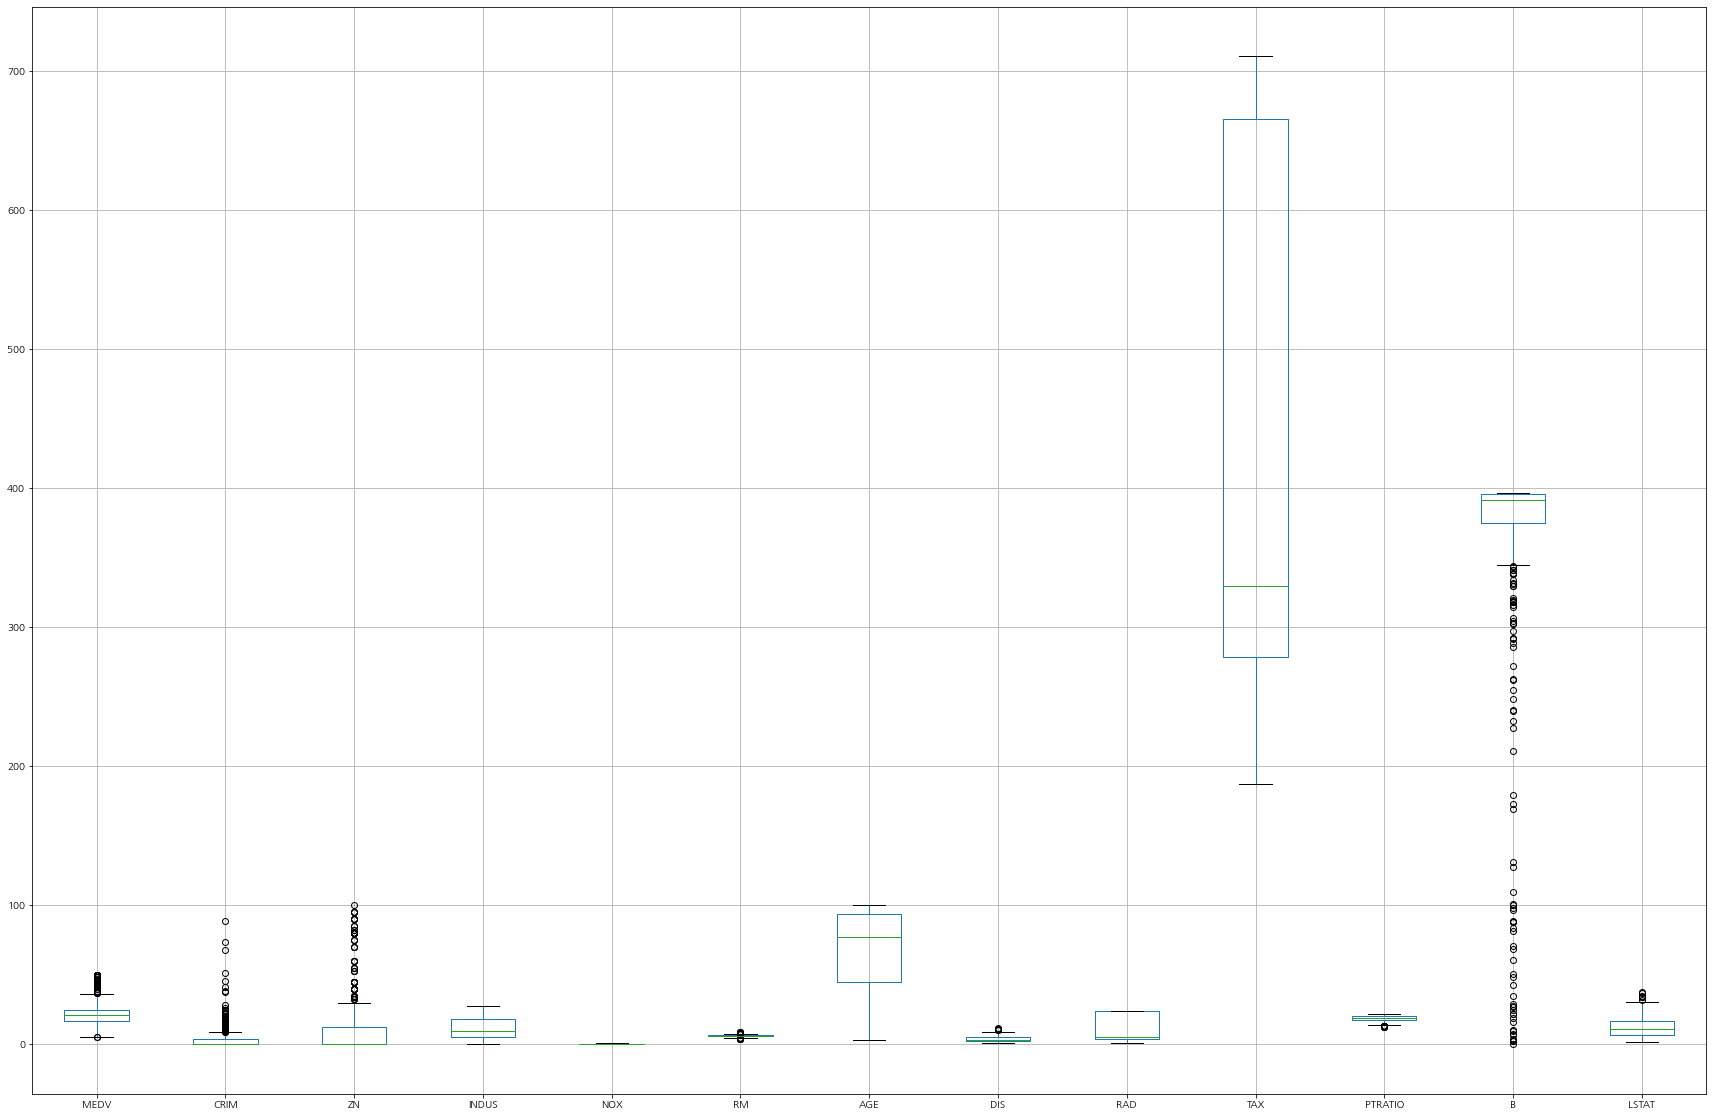

In [40]:
# boxplot 그리기 = figsize: 그래프 크기(x축, y축)
df_raw.boxplot(figsize = (30,20))

: 눈에 띄는 이상치는 보이지 않으므로, 이상치 처리를 별도로 하지 않는다.

# `3. 탐색적 기법`

## 3.1 히트맵을 통해 전체적인 상관관계 분석

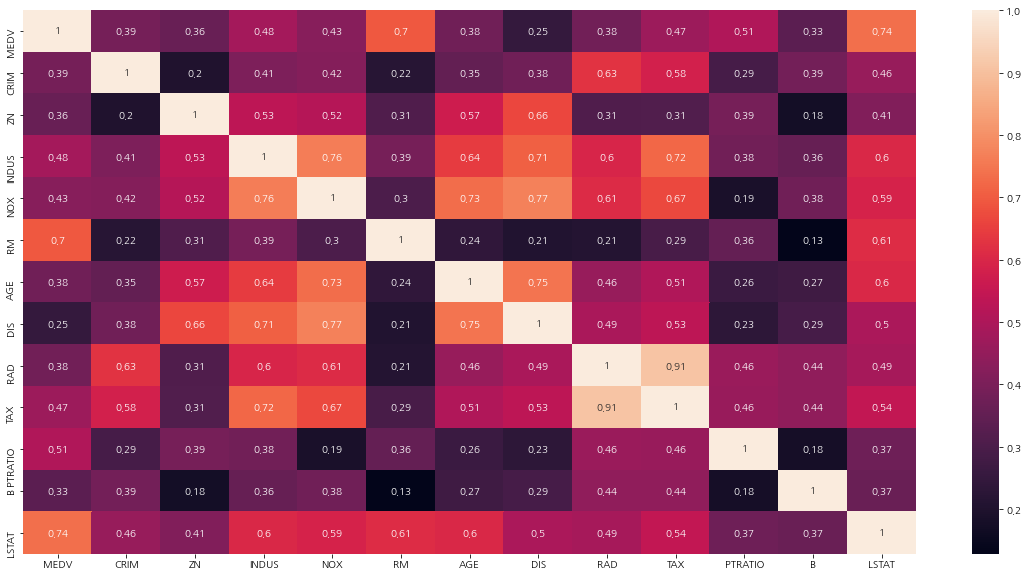

In [41]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_raw.corr().abs(),  annot=True)

## 3.2 가설1 - 범죄율(CRIM)과 주택가격(MEDV) Pairplot

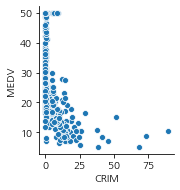

In [42]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["CRIM"])

: 범죄율이 올라갈수록 주택가격이 내려가는 경향을 확인할 수 있다.

## 3.3 가설2 - 주거당 평균 객실 수(RM)과 주택가격(MEDV) Pairplot

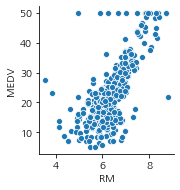

In [43]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["RM"])

: 평균 객실 수가 커지면, 주택가격이 올라가는 경향을 확인할 수 있다.

## 3.4 가설3 - 중심지(노동센터) 접근 거리(DIS)와 주택가격(MEDV) Pairplot

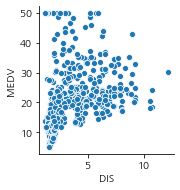

In [44]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["DIS"])

: 중심지 접근거리와 주택가격 사이에는 확실한 상관관계를 파악하기는 어려우므로 회귀분석을 통해 더 자세히 알아봐야한다.

## 3.5 가설4 - 학생당 교사 비율(PTRATIO)과 주택가격(MEDV) Pairplot

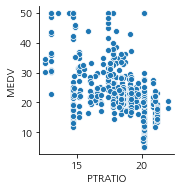

In [45]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["PTRATIO"])

: 학생당 교사 비율과 주택가격 사이에도 뚜렷한 상관관계가 보이지 않는다.

## 3.6 가설5 - 저소득층 비율(LSTAT)과 주택가격(MEDV) Pairplot

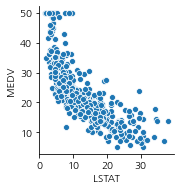

In [46]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["LSTAT"])

: 저소득층 비율이 커질수록 주택가격이 내려가는 경향성을 확인할 수 있다.

# `4. 모델링`

: 설명변수들과 목표변수(주택의 가격) 사이의 관계를 나타내는 모델을 만든다.

## 4.1 Training, Test Set 분리

In [47]:
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

In [48]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop("MEDV", axis=1, inplace=False)

In [49]:
# Train Data와 Test Data로 분할 (7:3 비율)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(354, 13)
train data Y size:(354,)
test data X size:(152, 13)
test data Y size:(152,)


## 4.2 다중회귀분석

: 모든 설명변수에 대한 다중회귀분석을 실시한다.

In [50]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

In [51]:
lr_model=smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',data=df_raw)
lr_result=lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          6.72e-135
Time:                        02:38:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4595      5.103      7.144   

1. 위 모델의 설명력은 0.741(74.1%)이다.
2. F-검정 결과, P-value는 0.05보다 매우 작으므로 통계값은 유효하다.
3. INDUS, AGE 값은 P-value가 0.05보다 매우 크므로 의미가 없는 값이다.

### 4.2.1 VIF (다중공선성 확인)

: 설명변수들간의 다중공선성을 확인한다.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale,minmax_scale,robust_scale

In [57]:
df_raw_x=df_raw.drop(["MEDV", "CHAS"],axis=1)
df_raw_x_const=add_constant(df_raw_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
#VIF정렬
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

,variable,VIF
11,B,1.345
10,PTRATIO,1.783
1,CRIM,1.788
5,RM,1.932
2,ZN,2.298
12,LSTAT,2.931
6,AGE,3.093
3,INDUS,3.949
7,DIS,3.955
4,NOX,4.389


: 확인결과, 모든 설명변수들의 VIF 값이 10이하로, 다중공선성을 보이는 설명변수는 없는 것으로 판단할 수 있다.

### 4.2.2 후진제거법

In [58]:
df_raw_y = df_raw["MEDV"]

model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select=5).fit(df_raw_x, df_raw_y)

#선택된 변수 
selected_cols = df_raw_x.columns[rfe.support_]

#제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("후진제거법 적용 후 선택된 변수들:",selected_cols)
print("후진제거법 적용 후 제거된 변수들:",removed_cols)

후진제거법 적용 후 선택된 변수들: Index(['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
후진제거법 적용 후 제거된 변수들: Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B'], dtype='object')


: 후진제거법을 통해 목표 변수를 설명하는 주요 설명변수들을 골라낸다.

In [59]:
#남은 변수들로 회귀 모델 생성
rfe_reg_model = smf.ols(formula="MEDV~ NOX + RM + DIS + PTRATIO + LSTAT",data = df_raw)

#회귀분석 표 출력
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          3.67e-131
Time:                        02:41:20   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

: 후진제거법을 통해 골라낸 주요 설명변수 5개 만을 이용해 다중회귀분석을 실시한 결과이다.

1. 위 모델의 설명력은 0.708(70.8%)이다. (설명변수 5개만을 사용하였는데, 꽤 높은 설명력을 가지고 있으므로, `효율성`이 좋은 모델이라 할 수 있다.
2. F-검정 결과, P-value는 0.05보다 매우 작으므로 통계값은 유효하다.
3. 모든 설명변수들의 P-value가 0.05보다 매우 작으므로 의미를 가지고 있다.
4. 식으로 표현하자면 다음과 같다.  
  
`MEDV  
= 37.4992 + (-17.9966)*NOX + (4.1633)*RM + (-1.1847)*DIS + (-1.0458)*PTRATIO + (-0.5811)*LSTAT`

## 4.3 다양한 모델의 기본형에 대입(DT, RF, GB) 및 주요인자 탐색

: 다양한 모델의 기본형에만 동일한 데이터를 넣어서 학습시키고 성능을 비교한다.

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 4.3.1 단순선형 회귀분석 모델

In [62]:
lr_model = smf.ols(formula="MEDV~ NOX + RM + DIS + PTRATIO + LSTAT",data = df_raw)
lr_result = lr_model.fit()

### 4.3.2 의사결정나무 모델

In [63]:
dt_model = DecisionTreeRegressor(random_state=1234)
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(random_state=1234)

### 4.3.3 랜덤포레스트 모델

In [64]:
rf_model = RandomForestRegressor(random_state=1234)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(random_state=1234)

### 4.3.4 그래디언트 부스팅 모델

In [68]:
gb_model = GradientBoostingRegressor(random_state=1234)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(random_state=1234)

### 4.3.5 모델 결과 비교

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [87]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

In [88]:
# 다중 회귀분석
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [89]:
# 의사결정나무
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [90]:
# 랜덤포레스트
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [91]:
# 그래디언트 부스팅
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [95]:
# matplotlib.rc("font", family="Noto Sans CJK JP")
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

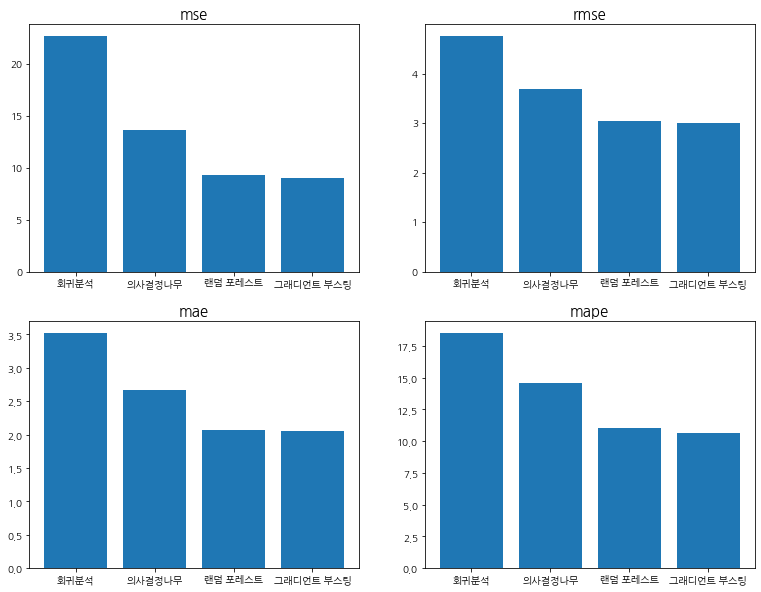

In [96]:
fig, ax = plt.subplots(2,2,figsize = (13,10))

ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)

: 다양한 에러값들을 비교해본 결과, 예측 성능은  

`회귀분석 < 의사결정나무 < 랜덤 포레스트 < 그래디언트 부스팅` 순서로 나타났다.